In [1]:
# Librerias necesarias
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from datetime import datetime
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, Resizing, UpSampling2D
from tensorflow.keras.layers import  Flatten, Dense,BatchNormalization,MultiHeadAttention, LayerNormalization, Permute, Add,Reshape
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import gelu
from tensorflow.keras.optimizers import Adam
from skimage import exposure
from PIL import Image
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt


In [2]:

# Define las rutas a las carpetas
base_dir = 'Photos'
categorias = ['benigno', 'maligno']

datos = []
etiquetas = []
desviacion_estandar_antes = []
desviacion_estandar_despues = []

In [3]:

# Carga las imágenes y sus etiquetas
for categoria in categorias:
    categoria_path = os.path.join(base_dir, categoria)
    for imagen_nombre in os.listdir(categoria_path):
        imagen_path = os.path.join(categoria_path, imagen_nombre)
        imagen = Image.open(imagen_path)
        
        # Calcular desviación estándar antes del preprocesamiento
        imagen_array = np.array(imagen)
        desviacion_estandar_antes.append(np.std(imagen_array))
        
        datos.append(imagen)
        etiquetas.append(categorias.index(categoria))  # Asigna 0 para 'No tiene' y 1 para 'Tiene'

       

In [4]:
# Convertir a arrays de NumPy para facilitar su manejo
desviacion_estandar_antes = np.array(desviacion_estandar_antes)

# Imprimir resultados
print("Desviación estándar antes del preprocesamiento:", desviacion_estandar_antes.mean())



Desviación estándar antes del preprocesamiento: 52.67622109559935


In [ ]:
datos_procesados1 =[]
for image in datos:
    imagen_array = np.array(image)
     # Aplicar CLAHE
    imagen_clahe = exposure.equalize_adapthist(imagen_array)
    datos_procesados1.append(imagen_clahe)


In [5]:
def grafica_comparacion(titulo1,titulo2,datos,datos_procesados,cantidad):
    for i in range(cantidad):
        # Aplicar CLAHE
        imagen_array = np.array(datos[i])
        imagen_clahe = np.array(datos_procesados[i])

        fig = plt.figure(figsize = (10,6)) 
        fig.add_subplot(121)
        plt.title(titulo1)
        plt.imshow(imagen_array, cmap='gray')
        
        fig.add_subplot(122)
        plt.title(titulo2)
        plt.imshow(imagen_clahe, cmap='gray')
        plt.show()



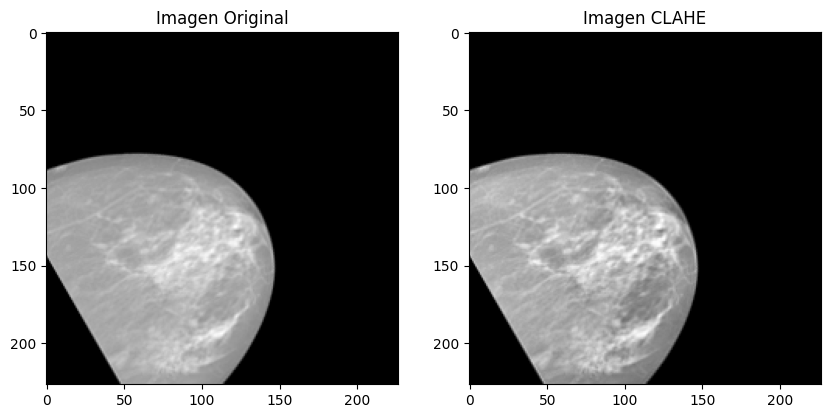

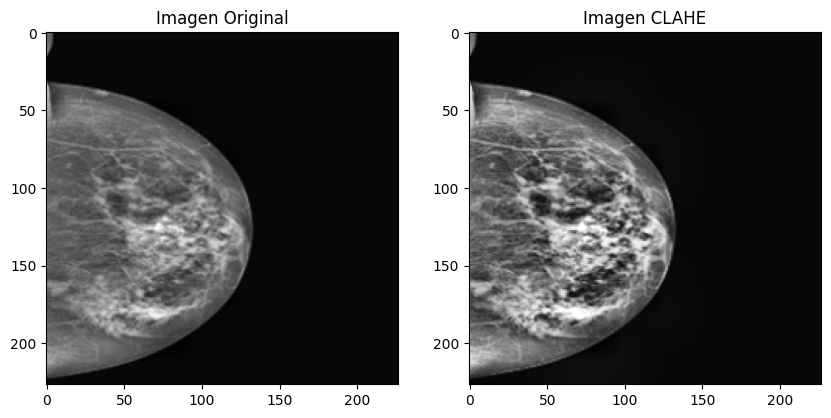

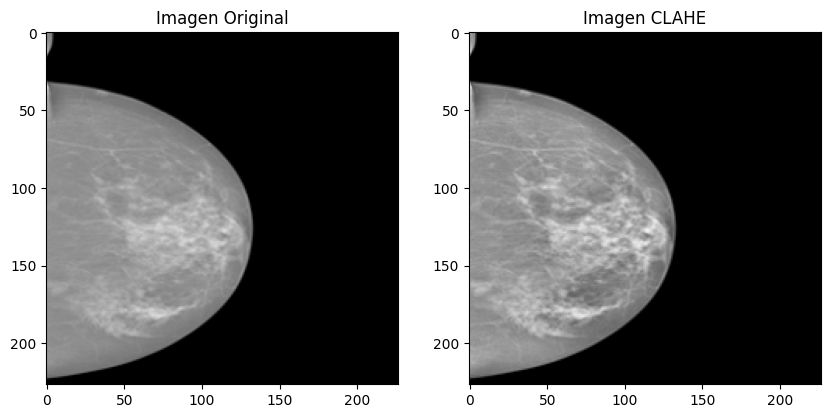

In [7]:
#GRAFICA 1

grafica_comparacion("Imagen Original","Imagen CLAHE",datos,datos_procesados1,3)

In [ ]:
datos_procesados2=[]
for image in datos_procesados1:
    # Aplicar reducción de ruido gaussiano con OpenCV
    imagen_gaussiana = cv2.GaussianBlur(np.array(image), (5, 5), 0)
    datos_procesados2.append(imagen_gaussiana)

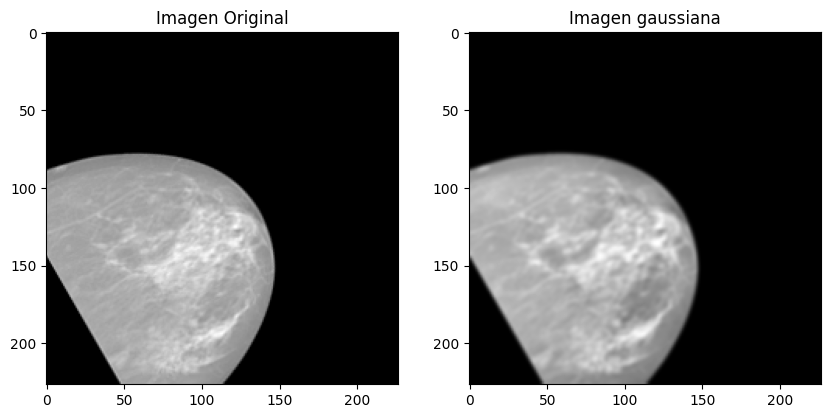

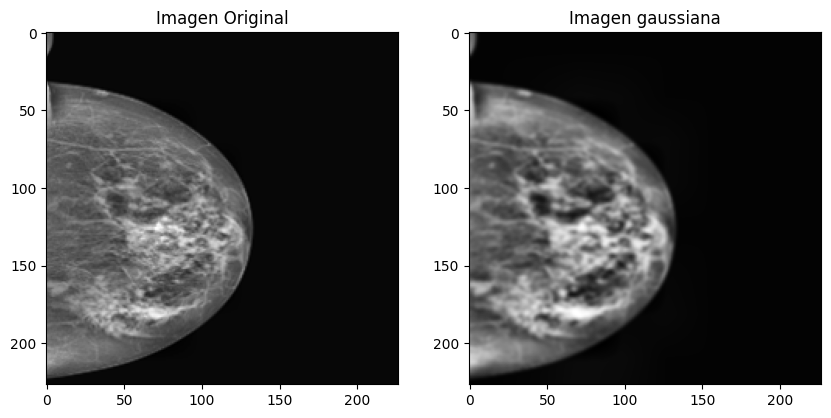

In [ ]:
#GRAFICA 
grafica_comparacion("Imagen Original","Imagen gaussiana",datos,datos_procesados2,2)

Dado la comparación de las imágenes con filtro gaussiano y las originales del dataset, se decide no aplicar este filtro ya que el suavisado produce que las imágenes de vean borrosas, a diferencias de lo hecho con CLAHE que aumente el contraste de la imagen

In [ ]:
datos_procesados3=[]
for image in datos_procesados1:

    # Aplicar Unsharp Masking (USM) con SciPy
    blurred = ndimage.gaussian_filter(image, 1)
    imagen_usm = image + 0.5 * (image - blurred)
    datos_procesados3.append(imagen_usm)
    

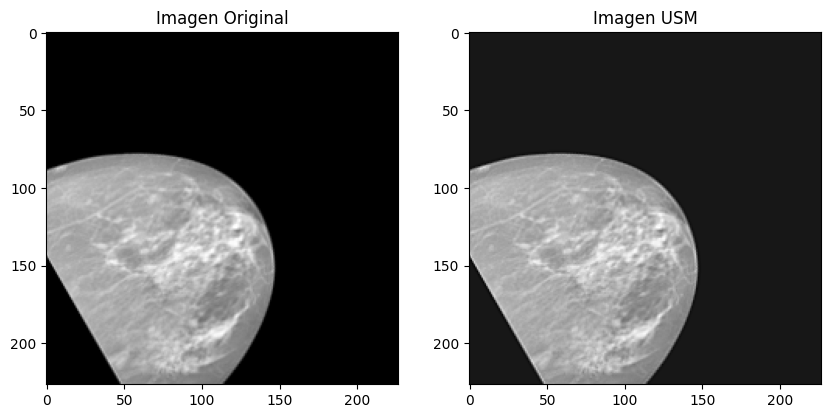

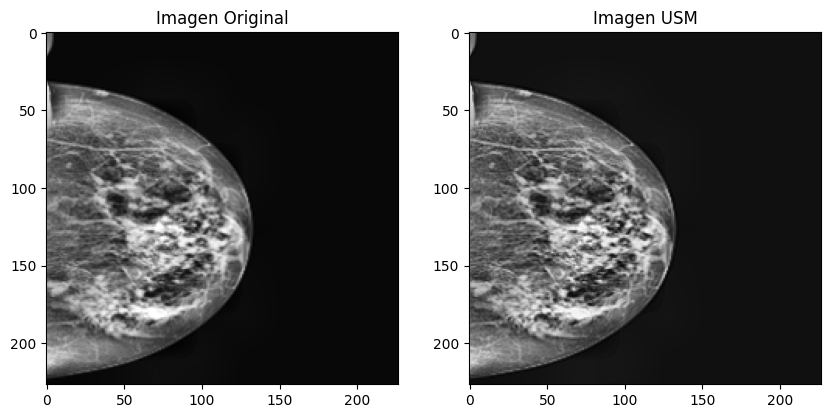

In [22]:
#GRAFICA 3
grafica_comparacion("Imagen Original","Imagen USM",datos_procesados1,datos_procesados3,2)

In [ ]:
"""
PAra este modelo no vamos a usar imagenes en rgb sino en gris


# Iterar sobre cada imagen en el arreglo
for i in range(len(datos_procesados3)):
    # Convertir la imagen de escala de grises a un objeto Image
    image_gray = Image.fromarray(datos_procesados3[i])

    # Verificar si la imagen ya tiene tres canales
    if image_gray.mode != 'RGB':
        # Convertir la imagen a RGB
        image_rgb = image_gray.convert("RGB")
    else:
        # Si ya tiene tres canales, mantenerla igual
        image_rgb = image_gray
    
    # Guardar la imagen de tres canales de nuevo en el arreglo
    datos_procesados3[i] = np.array(image_rgb)

"""


'\nPAra este modelo no vamos a usar imagenes en rgb sino en gris\n\n\n# Iterar sobre cada imagen en el arreglo\nfor i in range(len(datos_procesados3)):\n    # Convertir la imagen de escala de grises a un objeto Image\n    image_gray = Image.fromarray(datos_procesados3[i])\n\n    # Verificar si la imagen ya tiene tres canales\n    if image_gray.mode != \'RGB\':\n        # Convertir la imagen a RGB\n        image_rgb = image_gray.convert("RGB")\n    else:\n        # Si ya tiene tres canales, mantenerla igual\n        image_rgb = image_gray\n    \n    # Guardar la imagen de tres canales de nuevo en el arreglo\n    datos_procesados3[i] = np.array(image_rgb)\n\n'

In [ ]:
# Convierte listas a arrays de NumPy para facilitar su manejo
print(type(datos_procesados3[0]))
#for image in datos_procesados3:
#    imagen_f= image.convert()
#    datos_finales.append(imagen_f)
    

In [ ]:
# Calcular desviación estándar después del preprocesamiento
desviacion_estandar_despues=[]
for image in datos_procesados3:
    desviacion_estandar_despues.append(np.std(image))


In [ ]:
desviacion_estandar_despues = np.array(desviacion_estandar_despues)
print("Desviación estándar después del preprocesamiento:", desviacion_estandar_despues.mean())

Desviación estándar después del preprocesamiento: 0.2604105466215835


In [ ]:
"""
print(type(datos_finales))
datos_finales = np.array(datos_finales)
print(type(datos_finales))
"""

'\nprint(type(datos_finales))\ndatos_finales = np.array(datos_finales)\nprint(type(datos_finales))\n'

In [ ]:

"""
# Define las rutas a las carpetas
base_dir = 'Photos'
categorias = ['benigno', 'maligno']

datos = []
etiquetas = []

# Carga las imágenes y sus etiquetas
for categoria in categorias:
    categoria_path = os.path.join(base_dir, categoria)
    for imagen_nombre in os.listdir(categoria_path):
        imagen_path = os.path.join(categoria_path, imagen_nombre)
        imagen = Image.open(imagen_path)
        imagen_array = np.array(imagen)
        datos.append(imagen_array)
        etiquetas.append(categorias.index(categoria))  # Asigna 0 para 'No tiene' y 1 para 'Tiene'

# Convierte listas a arrays de NumPy para facilitar su manejo
datos = np.array(datos)
etiquetas = np.array(etiquetas)
"""

"\n# Define las rutas a las carpetas\nbase_dir = 'Photos'\ncategorias = ['benigno', 'maligno']\n\ndatos = []\netiquetas = []\n\n# Carga las imágenes y sus etiquetas\nfor categoria in categorias:\n    categoria_path = os.path.join(base_dir, categoria)\n    for imagen_nombre in os.listdir(categoria_path):\n        imagen_path = os.path.join(categoria_path, imagen_nombre)\n        imagen = Image.open(imagen_path)\n        imagen_array = np.array(imagen)\n        datos.append(imagen_array)\n        etiquetas.append(categorias.index(categoria))  # Asigna 0 para 'No tiene' y 1 para 'Tiene'\n\n# Convierte listas a arrays de NumPy para facilitar su manejo\ndatos = np.array(datos)\netiquetas = np.array(etiquetas)\n"

In [4]:


etiquetas=np.array(etiquetas)
#datos_procesados3 = np.array(datos_procesados3)
datos_procesados3 = np.array(datos)

# Dividir los datos en entrenamiento (70%) y datos restantes (30%)
X_train, X_remaining, y_train, y_remaining = train_test_split(datos_procesados3, etiquetas, test_size=0.3, random_state=42)

# Dividir los datos restantes en validación (50%) y prueba (50%)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)


In [6]:
datos.clear()
#datos_procesados1.clean()



In [7]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (17203, 227, 227)
Forma de X_val: (3686, 227, 227)
Forma de X_test: (3687, 227, 227)
Forma de y_train: (17203,)
Forma de y_val: (3686,)
Forma de y_test: (3687,)


In [8]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_val = np.expand_dims(X_val,axis=-1)


# Verifica las nuevas formas
print(f"Nueva forma de datos de entrenamiento: {X_train.shape}")
print(f"Nueva forma de datos de prueba: {X_test.shape}")
print(f"Nueva forma de datos de validacion: {X_test.shape}")

Nueva forma de datos de entrenamiento: (17203, 227, 227, 1)
Nueva forma de datos de prueba: (3687, 227, 227, 1)
Nueva forma de datos de validacion: (3687, 227, 227, 1)


In [9]:


# Crea un generador de datos de imagen con aumento de datos para el entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Reescala las imágenes por el factor dado  
    shear_range=0.2,  # Cizallamiento
    horizontal_flip=True,
    zoom_range=0.2,  # Zoom
    fill_mode='nearest'  # Estrategia para rellenar los píxeles que pueden aparecer después de una transformación
)


# Para el conjunto de prueba solo se normalizan los datos
test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

# Suponiendo que 'datos_entrenamiento' y 'datos_prueba' están en la forma correcta 
#(num_samples, height, width, channels)
# y que 'etiquetas_entrenamiento' y 'etiquetas_prueba' están codificadas adecuadamente 
#(por ejemplo, one-hot encoding para clasificación multiclase)

# Crea un generador que suministrará los datos de entrenamiento al modelo durante el entrenamiento
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32  # Tamaño del lote
)

# Crea un generador para los datos de prueba
test_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=32
)

val_generator = val_datagen.flow(
    X_val,
    y_val,
    batch_size=32
)
                                                


In [10]:
print("GPUs disponibles: ", tf.config.list_physical_devices('GPU'))

GPUs disponibles:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
#Early stopping para que se detenga el entranamiento si a las 5 épocas no mejora el accuracy

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)


In [12]:

# callback para detener el entrenamiento si se alcanza el accuracy deseado
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("Accuracy alcanzado")
      self.model.stop_training = True


In [13]:
stop = myCallback()


""""probar con algun modelo, ninguno de los anteriores ha sido bueno"""

"""
model = Sequential()

# Agregar la primera capa convolucional
model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu', input_shape=(227, 227, 1)))

# Agregar la primera capa de MaxPooling
model.add(MaxPooling2D((3, 3), strides=(3, 3)))

# Agregar la segunda capa convolucional
model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu'))

# Agregar dos capas convolucionales más
model.add(Conv2D(64, (3, 3), activation='relu'))

# Agregar la segunda capa de MaxPooling
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Agregar tres capas convolucionales más
#for _ in range(3):
model.add(Conv2D(128, (3, 3), activation='relu'))

# Aplanar los mapas de características
model.add(Flatten())

# Agregar una capa completamente conectada (Fully Connected) con 1024 neuronas
model.add(Dense(1024, activation='relu'))

# Agregar la capa de salida con 2 neuronas (para la clasificación binaria)
model.add(Dense(1, activation='sigmoid'))
"""


""""probar con algun modelo, ninguno de los anteriores ha sido bueno"""
model = Sequential()

# Agregar la primera capa convolucional
model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu', input_shape=(227, 227, 1)))

# Agregar la primera capa de MaxPooling
model.add(MaxPooling2D((3, 3), strides=(3, 3)))

# Agregar la segunda capa convolucional
model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu'))

# Agregar dos capas convolucionales más
for _ in range(2):
    model.add(Conv2D(64, (3, 3), activation='relu'))

# Agregar la segunda capa de MaxPooling
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Agregar tres capas convolucionales más
for _ in range(3):
    model.add(Conv2D(128, (3, 3), activation='relu'))

# Aplanar los mapas de características
model.add(Flatten())

# Agregar una capa completamente conectada (Fully Connected) con 1024 neuronas
model.add(Dense(1024, activation='relu'))

# Agregar la capa de salida con 2 neuronas (para la clasificación binaria)
model.add(Dense(1, activation='sigmoid'))


# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 113, 113, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
with tf.device('/GPU:0'):
    history = model.fit(train_generator,
                        epochs=30,
                        validation_data=val_generator,
                        verbose=1,
                        callbacks=[early_stopping,stop])

Epoch 1/30
538/538 [==============================] - 63s 102ms/step - loss: 0.6855 - accuracy: 0.5569 - val_loss: 0.6816 - val_accuracy: 0.5412
Epoch 2/30
538/538 [==============================] - 44s 81ms/step - loss: 0.6837 - accuracy: 0.5568 - val_loss: 0.6814 - val_accuracy: 0.5540
Epoch 3/30
538/538 [==============================] - 70s 131ms/step - loss: 0.6823 - accuracy: 0.5630 - val_loss: 0.6850 - val_accuracy: 0.5336
Epoch 4/30
538/538 [==============================] - 99s 185ms/step - loss: 0.6735 - accuracy: 0.5793 - val_loss: 0.6668 - val_accuracy: 0.5857
Epoch 5/30
538/538 [==============================] - 93s 173ms/step - loss: 0.6426 - accuracy: 0.6272 - val_loss: 0.6041 - val_accuracy: 0.6747
Epoch 6/30
538/538 [==============================] - 103s 192ms/step - loss: 0.5408 - accuracy: 0.7306 - val_loss: 0.4424 - val_accuracy: 0.7846
Epoch 7/30
538/538 [==============================] - 102s 189ms/step - loss: 0.4454 - accuracy: 0.7922 - val_loss: 0.4189 - val_a

In [16]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

116/116 [==============================] - 3s 26ms/step - loss: 0.2612 - accuracy: 0.8600
Test Accuracy: 0.8600488305091858


In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [18]:
# Visualización de curvas de pérdida y precisión
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    
    plt.show()

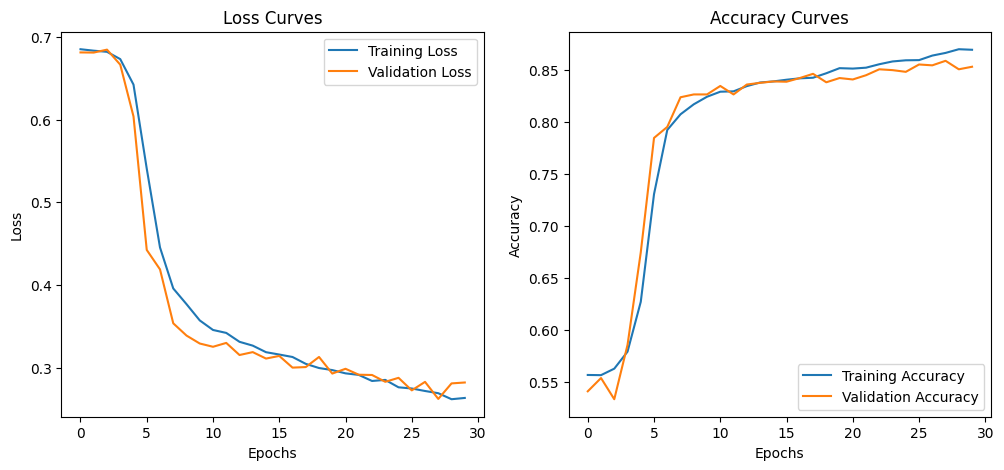

In [19]:
plot_training_history(history)

116/116 [==============================] - 0s 4ms/step


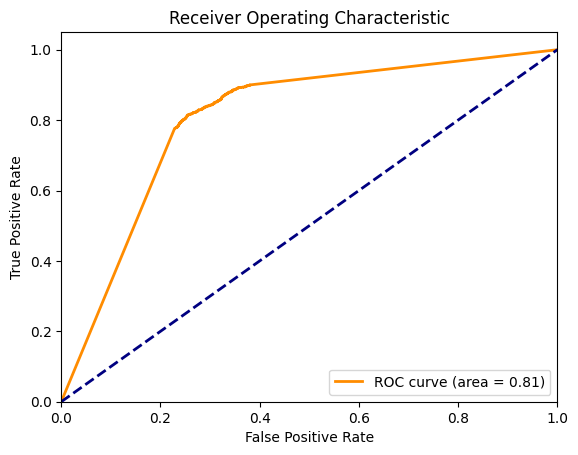

AUC: 0.81


In [35]:
from sklearn.metrics import roc_curve, auc, recall_score,f1_score
import matplotlib.pyplot as plt

# Use the trained model to predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert y_pred_prob to a 1-dimensional array if it's 2-dimensional with only one column
if y_pred_prob.shape[1] == 1:
    y_pred_prob = y_pred_prob.ravel()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC: {roc_auc:.2f}')


116/116 [==============================] - 0s 4ms/step
Matriz de Confusión:
[[1213  397]
 [ 412 1665]]


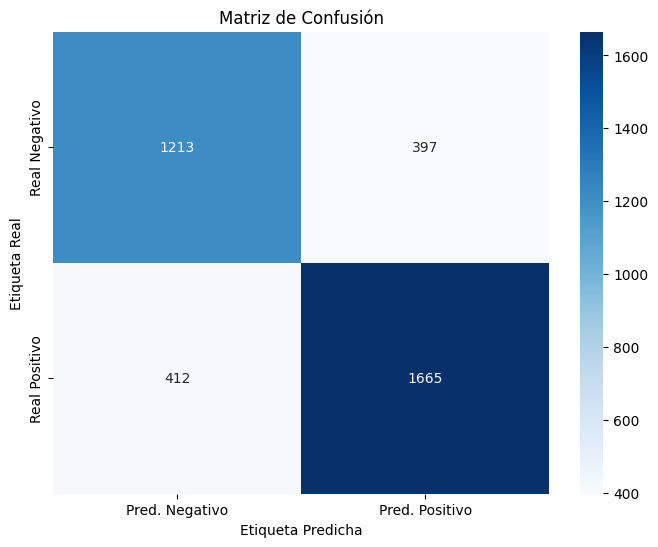

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(X_test)

# Paso 4: Convierte las probabilidades en etiquetas de clase usando un umbral de 0.5
threshold = 0.5
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Paso 5: Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Paso 6: Muestra la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Paso 7: Visualiza la matriz de confusión usando una gráfica de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred. Negativo', 'Pred. Positivo'], yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [37]:
# Calcular recall y F-score
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Recall: 0.80
F1-score: 0.80
